# **Introduction to Portfolio Analysis in Python**

## **Chapter 1 - Introduction to Portfolio Analysis**

**Calculate mean returns**

In this exercise, you're going to calculate performance for a four stock portfolio over the period January 2015 through March 2019. The portfolio consists of Proctor & Gamble, Microsoft, JP Morgan and General Electric stocks. You'll discover that multiplying the mean return of each stock with its portfolio weight, is a very quick and straightforward way to calculate portfolio performance over a given period of time.

The four columns in the DataFrame data contain the prices of these four stocks mentioned above. Have a look at data by inspecting it in the console.

In [1]:
import pandas as pd

data = pd.read_csv("small_portfolio.csv")
data.head()

,date,GE,JPM,MSFT,PG
0,2015-01-02,25.06,62.49,46.760,90.44
1,2015-01-05,24.60,60.55,46.325,90.01
2,2015-01-06,24.07,58.98,45.650,89.60
3,2015-01-07,24.08,59.07,46.230,90.07
4,2015-01-08,24.37,60.39,47.590,91.10


In [2]:
data.tail()

,date,GE,JPM,MSFT,PG
808,2018-03-21,13.88,114.74,92.48,77.04
809,2018-03-22,13.35,109.95,89.79,76.41
810,2018-03-23,13.07,107.01,87.18,75.91
811,2018-03-26,12.89,110.31,93.78,76.41
812,2018-03-27,13.44,108.17,89.47,77.79


In [7]:
data = data.set_index('date')
data.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [8]:
import numpy as np

# Calculate percentage returns
returns = data.pct_change()

# Calculate individual mean returns
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(weights*meanDailyReturns)

# Print the portfolio return
print(portReturn)

-1.6782226618545438e-05


In [12]:
returns

,GE,JPM,MSFT,PG,Portfolio
date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755,-0.017723
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555,-0.019328
2015-01-07,0.000415,0.001526,0.012705,0.005246,0.003579
2015-01-08,0.012043,0.022346,0.029418,0.011436,0.017518
...,...,...,...,...,...
2018-03-21,0.017595,0.000872,-0.006979,-0.016218,0.005954
2018-03-22,-0.038184,-0.041747,-0.029087,-0.008178,-0.034077
2018-03-23,-0.020974,-0.026739,-0.029068,-0.006544,-0.022303


**Portfolio cumulative returns**

In the previous exercise, you've calculated the mean performance over a period of time. This gives you one performance number for that entire period. But what if you would want to plot the development of the performance over time? For that, you will need the cumulative performance, not the mean performance. Just like with interest in your bank account, the cumulative performance gives you the compounded return at each date in your dataset. It tells you; "up until today, this is what the total return has been since the start of my data."

Remember because of the compounding effect, you need to use cumprod() for this calculation. NumPy has already been imported as np and available are the daily returns data from the previous exercise under returns. Let's give it a try!

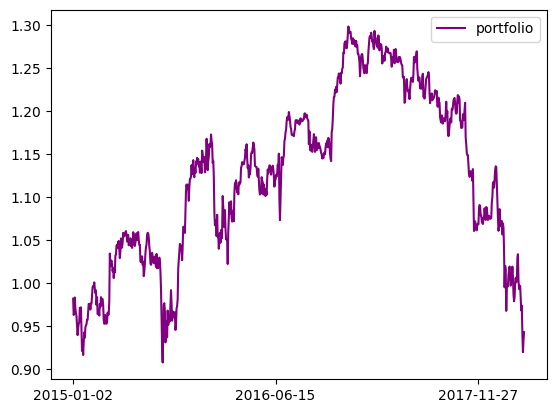

In [14]:
import matplotlib
import matplotlib.pyplot as plt

weights = np.array([0.5, 0.2, 0.2, 0.1])
returns.drop('Portfolio', axis=1, inplace=True)

# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)

# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

**The effect of diversification**

In this exercise you're going to compare performance of four individual stocks, to a portfolio of the same four stocks. You'll see that 2 out of the four stocks will under-perform over a time period of roughly four years, and two will perform quite well.

The stocks you're going to investigate are General Electric, JP Morgan, Microsoft and Proctor & Gamble.

Let's play a little game: pick one stock to invest in, then, let's see how it would have performed over time. There's a 50-50 chance that you'll pick a winning stock, versus a losing stock. Let's look at the data and see whether your stock is one of strong performers.

In [19]:
daily_cum_ret

,GE,JPM,MSFT,PG,Portfolio
date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.981644,0.968955,0.990697,0.995245,0.982277
2015-01-06,0.960495,0.943831,0.976262,0.990712,0.963292
2015-01-07,0.960894,0.945271,0.988666,0.995909,0.966739
2015-01-08,0.972466,0.966395,1.017750,1.007298,0.983674
...,...,...,...,...,...
2018-03-21,0.553871,1.836134,1.977759,0.851835,0.974287
2018-03-22,0.532721,1.759482,1.920231,0.844870,0.941086
2018-03-23,0.521548,1.712434,1.864414,0.839341,0.920097


In [28]:
def plot_pct_returns(df):
    fig, ax = plt.subplots()
    ax.plot(df.index, df.MSFT, marker='', color='green', linewidth=2, label="MSFT")
    ax.plot(df.index, df.Portfolio, linewidth=2, linestyle='dashed', color='skyblue', label='Portfolio')
    ax.plot(df.index, df.PG, marker='', color='pink', linewidth=2, label="PG")
    ax.plot(df.index, df.JPM, color='yellow', linewidth=2, label='JPM')
    ax.plot(df.index, df.GE, color='red', linewidth=2, label='GE')
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend()
    plt.show()

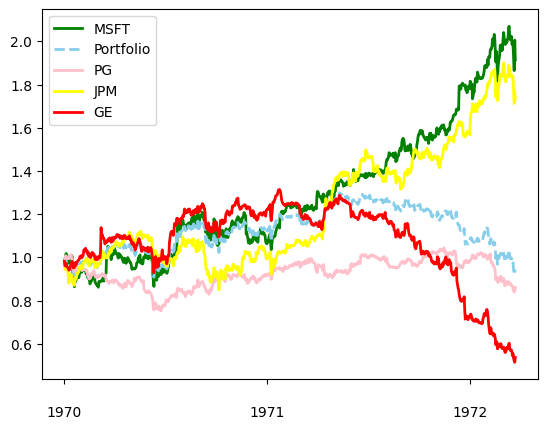

In [29]:
plot_pct_returns(daily_cum_ret)

**Measuring risk of a portfolio**

Returns spread around the mean is measured by the variance and is a common measure of volatility:

\begin{align}
\sigma^2 = \frac{\sum_{i=1}^N(X-\mu)^2}{N}
\end{align}

Variance of an individual asset varies: some have more or less spread around the mean.

Variance of the portfolio is not simply the weighted variances of the underlying assets.

The correlation between assets 1 and 2 tells us to which extend assets move together and is denoted by $\rho_{1,2}$.

The portfolio variance takes into account the individual assets' variances $(\sigma_1^2, \sigma_2^2, etc)$, the weights of the assets in the portfolio $(w_1, w_2)$, as well as their correlation to each other.

The standard deviation $(\sigma)$ is equal to the square root of variance $(\sigma^2)$, both are a measure of volatility.


**Calculating portfolio variance**

The portfolio (with 2 stocks) variance:

\begin{align}
\sigma_{pf}^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\rho_{1,2}\sigma_1\sigma_2
\end{align}

$\rho_{1,2}\sigma_1\sigma_2$ is called the covariance between asset 1 and 2.

The covariance can also be written as $\sigma_{1,2}$

This let us write:

\begin{align}
\sigma_{pf}^2 = w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\sigma_{1,2}
\end{align}

This can be re-written in matrix notation, which you can use more easily in code:

\begin{align}
\sigma_{pf}^2 =
\left[\begin{array}{ccc}
w_1 & w_2
\end{array}\right]
\left[\begin{array}{ccc}
\sigma_1^2 & \sigma_{1,2} \\
\sigma_{2,1} & \sigma_2^2
\end{array}\right]
\left[\begin{array}{ccc}
w_1 \\ w_2
\end{array}\right]
\end{align}

Portfoilio variance = Weights transposed x (Covariance matrix x Weights)

**Portfolio variance**

Your turn! It's time to calculate the risk of our 4-stock portfolio. Let's start with the pricing data, available under data. You'll have to calculate daily percentage returns and assign weights to your portfolio. You'll then continue by calculating the covariance matrix, and use the following formula: Portfolio variance = Weights transposed x (Covariance matrix x Weights) to get the final portfolio variance.

As calculating portfolio variance is an important part of portfolio analysis, make sure you take your time to understand each step, and go back to the slides if you need to. Good luck!

In [15]:
# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

# Calculate the covariance matrix
cov_matrix = (daily_returns.cov())*250

# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

2.55%


**Question**

Looking at our covariance matrix cov_matrix, which stock in our portfolio has the highest risk? Print it in the console if you need to have another look at it.

In [16]:
cov_matrix

,GE,JPM,MSFT,PG
GE,0.045987,0.022828,0.016285,0.010101
JPM,0.022828,0.046660,0.024135,0.010812
MSFT,0.016285,0.024135,0.054054,0.014144
PG,0.010101,0.010812,0.014144,0.020645


**Answer**

Microsoft is the riskiest, since it's variance os 5.4%, which is the highest of all the stocks in the portfolio.

The variances of the stocks are in the diagonal of the covariance matrix. The variance tell us how much the returns of individual stocks deviate from their mean. Microsoft seems to have relatively the highest variance of them all.

**Standard deviation versus variance**

Let's talk about the difference between variance and standard deviation. From the video you already know that the standard deviation
 is simply the square root of the variance. Both measures are used in practice to calculate market or stock volatility. Why should you use one or the other?

In the variance calculation we square the weights and the variances. Because of this squaring, the variance is no longer in the same unit of measurement as the original data. Taking the root of the variance means the standard deviation is restored to the original unit of measure and therefore much easier to interpret.

Let's calculate the standard deviation. Available are the weights and the cov_matrix from the previous exercise.

In [17]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Print the results
print(str(np.round(port_standard_dev, 4) * 100) + '%')

15.959999999999999%
